In [210]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [230]:
import os
import scipy
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, timedelta


# Reflect Tables into SQLAlchemy ORM

In [231]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.orm import declarative_base
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [232]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:////Users/lynn/Documents/sqlalchemy-challenge/Resources/hawaii.sqlite')

In [233]:
# get the current working directory
cwd = os.getcwd()

# join the current working directory with the database filename
db_file = os.path.join(cwd,'hawaii.sqlite')

# check if the file exists
if os.path.exists(db_file):
    print(f"The file {db_file} exists.")
else:
    print(f"The file {db_file} does not exist.")


The file /Users/lynn/Documents/sqlalchemy-challenge/hawaii.sqlite does not exist.


In [234]:
file_path = "/Users/lynn/Documents/sqlalchemy-challenge/Resources/hawaii.sqlite"

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")


File exists


In [235]:
print(os.getcwd())


/Users/lynn/Documents/sqlalchemy-challenge


In [236]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [237]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [238]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

# Assign the Station class to a variable called `Station`
Station = Base.classes.station

In [239]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)


# Exploratory Precipitation Analysis

In [240]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# get the names of tables in the database
table_names = inspector.get_table_names()
print(table_names)

['measurement', 'station']


In [241]:
#inspect measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [242]:
#inspect station table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [243]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date[0])


2017-08-23


In [247]:
# Calculate the date 1 year ago from the most recent date in the database
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Starting from the most recent data point in the database. 
most_recent_date_obj = datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago_date = most_recent_date_obj - timedelta(days=365)


In [249]:
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= one_year_ago_date).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [264]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','prcp'])
df.set_index('date', inplace=True)

In [265]:
# Sort the dataframe by date
df.sort_index(inplace=True)


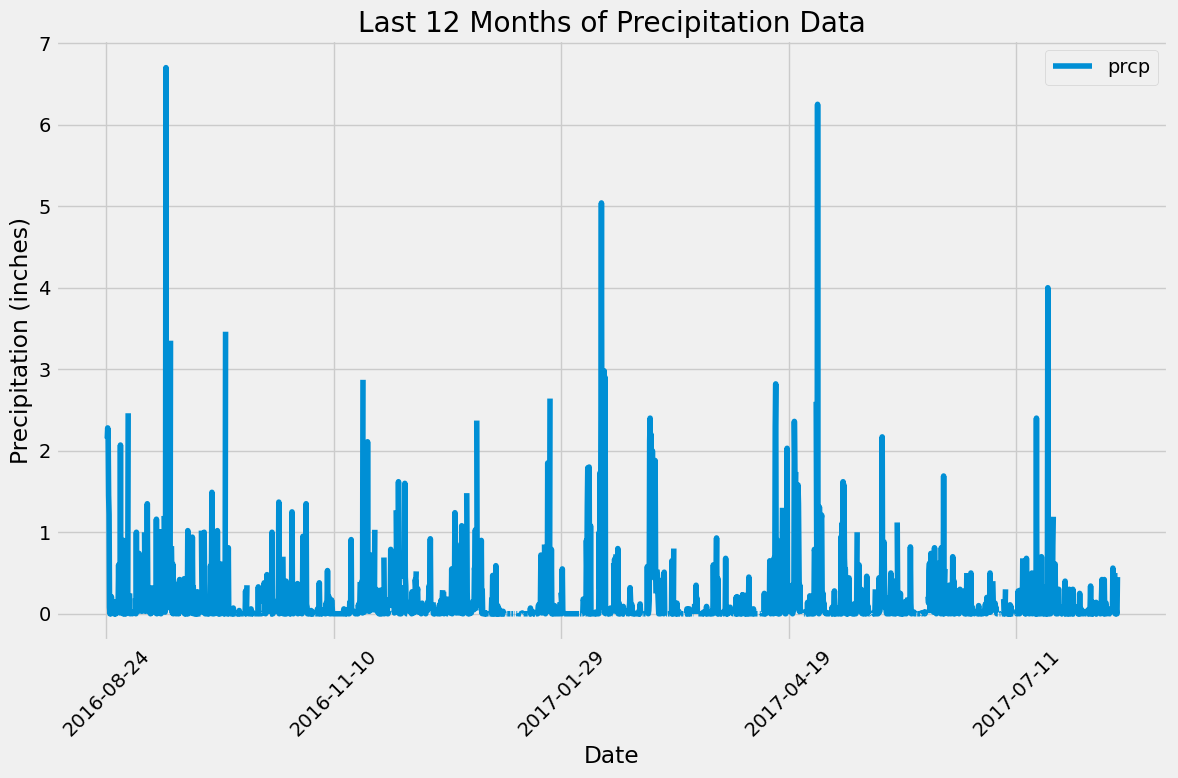

In [266]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation data
df.plot(figsize=(12,8))
plt.title('Last 12 Months of Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [272]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset



In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [131]:
# Close Session
session.close()